# A-KAZE

In [169]:
import cv2
from scipy.spatial.distance import hamming, euclidean as l2
import matplotlib.pyplot as plt

In [170]:
def create_akaze_descriptors(img1, img2):
    akaze = cv2.AKAZE_create()

    kp1, des1 = akaze.detectAndCompute(img1, None)
    kp2, des2 = akaze.detectAndCompute(img2, None)

    return kp1, des1, kp2, des2


def lib_bf_matcher(des1, des2, prev=30):
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    mtchs = bf.match(des1, des2)
    mtchs = sorted(mtchs, key=lambda x: x.distance)
    print(f'{len(mtchs)}')

    return mtchs[:prev]


def match(des1, des2, norm):
    mtchs = []

    for i, d1 in enumerate(des1):
        best_dist, idx = 2**64, 0

        for j, d2 in enumerate(des2):
            cur_dist = norm(d1, d2)

            if cur_dist < best_dist:
                best_dist, idx = cur_dist, j

        mtchs.append(cv2.DMatch(
            _distance=best_dist,
            _imgIdx=0,
            _queryIdx=i,
            _trainIdx=idx
        ))

    return mtchs


def custom_bf_matcher(des1, des2, norm=hamming, prev=30):
    mtchs = match(des1, des2, norm=norm)
    mtchs = sorted(mtchs, key=lambda x: x.distance)
    print(f'{len(mtchs)}')

    return mtchs[:prev]

In [197]:
mode = cv2.IMREAD_GRAYSCALE
# mode = None
img1 = cv2.imread('src/im9.png', mode)
img2 = cv2.imread('src/im9_.png', mode)

# swap
img1, img2 = img2, img1

kpoints1, descriptor1, kpoints2, descriptor2 = create_akaze_descriptors(img1, img2)


def draw(mtch):
    img = cv2.drawMatches(
        img1, kpoints1,
        img2, kpoints2,
        mtch, None,
        flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS
    )
    return img


def cv2_show(mtch):
    img = draw(mtch)

    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


def mpl_show(mtch):
    img = draw(mtch)

    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.show()

In [198]:
matches = lib_bf_matcher(descriptor1, descriptor2, prev=10)
cv2_show(matches)

16


In [202]:
matches2 = custom_bf_matcher(descriptor1, descriptor2, norm=l2, prev=10)
cv2_show(matches2)

17


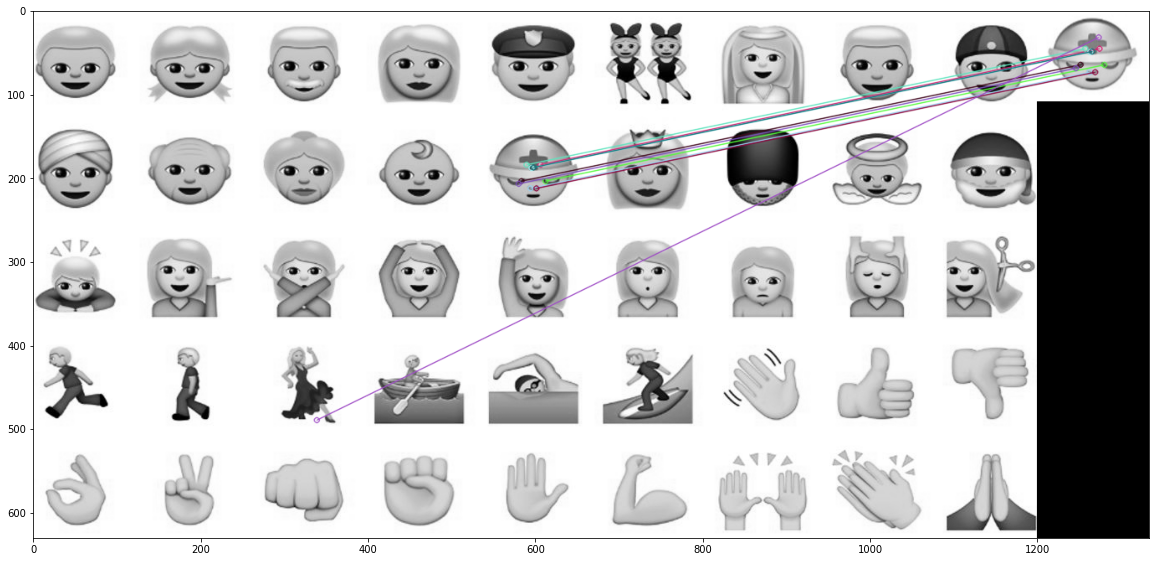

In [182]:
mpl_show(matches)

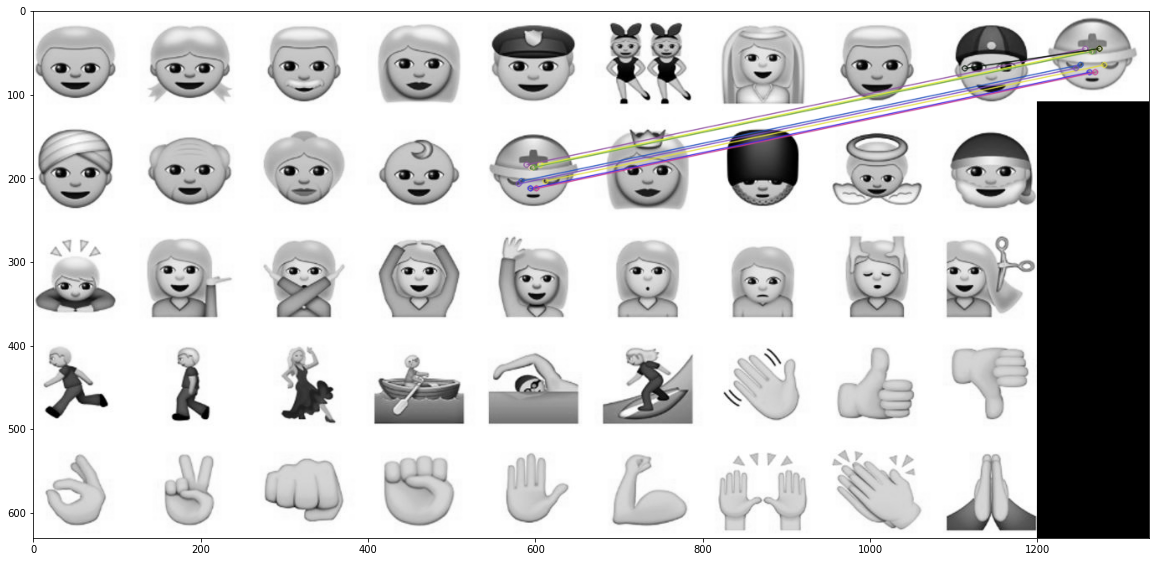

In [181]:
mpl_show(matches2)